<a href="https://colab.research.google.com/github/DmitriyDikunov/python-4-7/blob/main/Lab2%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=13MOq5YcHA3RsWJ7MWHqU1PxQ9wSehgLP
To: /content/titanic.csv
100%|██████████| 29.5k/29.5k [00:00<00:00, 36.2MB/s]


Розмір датасету (рядки, стовпці): (418, 12)
Типи даних:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Пропущені значення перед заміною:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Пропущені значення після заміни:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
Кількість дублікатів: 0
Описова статистика:
        PassengerId    Survived      Pclass         Age   

<ipython-input-2-0c9576b329c8>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_selected_df['Sex'] = titanic_selected_df['Sex'].map({'male': 1, 'female': 0})
<ipython-input-2-0c9576b329c8>:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = titanic_selected_df.groupby(fare_bins)['Survived'].mean() * 100



Останні 5 рядків датасету:
     Survived  Pclass  Sex       Age      Fare
413         0       3    1  30.27259    8.0500
414         1       1    0  39.00000  108.9000
415         0       3    1  38.50000    7.2500
416         0       3    1  30.27259    8.0500
417         0       3    1  30.27259   22.3583
Відсоток виживання за статтю:
Sex
0    100.0
1      0.0
Name: Survived, dtype: float64
Відсоток виживання за класом:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64
Клас з найвищим рівнем виживання: 1
Середній вік тих, хто вижив: 30.27239973050095, тих, хто не вижив: 30.272699293414263
Виживання за рівнями тарифів:
Fare
(-0.001, 7.896]    26.315789
(7.896, 14.454]    27.083333
(14.454, 31.5]     39.047619
(31.5, 512.329]    53.398058
Name: Survived, dtype: float64
Середній тариф для кожного класу:
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64
Різниця в тарифах між класами: 81.71434633163229
Середній вік пасажирів з

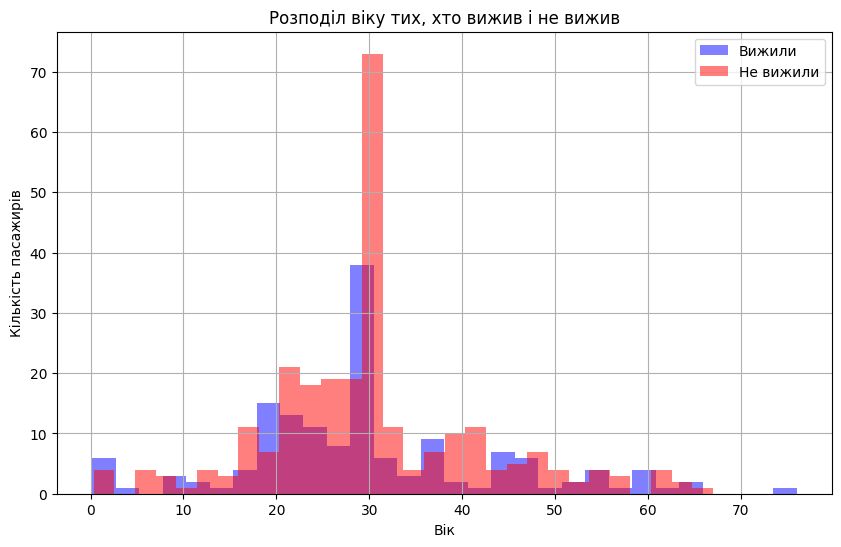

Відсоток виживання за комбінацією статі та класу:
Sex  Pclass
0    1         100.0
     2         100.0
     3         100.0
1    1           0.0
     2           0.0
     3           0.0
Name: Survived, dtype: float64
Група з найвищим рівнем виживання: (0, 1)
Кореляція між числовими змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000
Змінна з найбільш сильною кореляцією з виживанням: Fare


In [2]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt

file_id = '13MOq5YcHA3RsWJ7MWHqU1PxQ9wSehgLP'
download_url = f'https://drive.google.com/uc?id={file_id}'

output = 'titanic.csv'
gdown.download(download_url, output, quiet=False)

titanic_df = pd.read_csv(output)

dataset_shape = titanic_df.shape
print("Розмір датасету (рядки, стовпці):", dataset_shape)

data_types = titanic_df.dtypes
print("Типи даних:\n", data_types)

missing_values_before = titanic_df.isnull().sum()
print("Пропущені значення перед заміною:\n", missing_values_before)

titanic_df.fillna(titanic_df.mean(numeric_only=True), inplace=True)

missing_values_after = titanic_df.isnull().sum()
print("Пропущені значення після заміни:\n", missing_values_after)

duplicates = titanic_df.duplicated().sum()
print("Кількість дублікатів:", duplicates)
titanic_df.drop_duplicates(inplace=True)
describe_data = titanic_df.describe()
print("Описова статистика:\n", describe_data)

if 'Cabin' in titanic_df.columns:
    titanic_df.drop(columns=['Cabin'], inplace=True)
    print("Стовпчик 'Cabin' видалено.")

selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
titanic_selected_df = titanic_df[selected_columns]

unique_values = titanic_selected_df['Sex'].unique()
print("Унікальні значення у стовпчику 'Sex':", unique_values)

titanic_selected_df['Sex'] = titanic_selected_df['Sex'].map({'male': 1, 'female': 0})

print("Оновлені значення у стовпчику 'Sex':\n", titanic_selected_df['Sex'].head())
print(titanic_selected_df.head())
missing_values_check = titanic_selected_df.isnull().sum()
print("Пропущені значення після обробки:", missing_values_check, sep='\n')

print("Перші 5 рядків датасету:", titanic_selected_df.head(), sep='\n')

print("Останні 5 рядків датасету:", titanic_selected_df.tail(), sep='\n')

survival_by_sex = titanic_selected_df.groupby('Sex')['Survived'].mean() * 100
print("Відсоток виживання за статтю:", survival_by_sex, sep='\n')

survival_by_class = titanic_selected_df.groupby('Pclass')['Survived'].mean() * 100
print("Відсоток виживання за класом:", survival_by_class, sep='\n')
highest_survival_class = survival_by_class.idxmax()
print(f"Клас з найвищим рівнем виживання: {highest_survival_class}")

mean_age_survived = titanic_selected_df[titanic_selected_df['Survived'] == 1]['Age'].mean()
mean_age_not_survived = titanic_selected_df[titanic_selected_df['Survived'] == 0]['Age'].mean()
print(f"Середній вік тих, хто вижив: {mean_age_survived}, тих, хто не вижив: {mean_age_not_survived}")

fare_bins = pd.qcut(titanic_selected_df['Fare'], 4)
survival_by_fare = titanic_selected_df.groupby(fare_bins)['Survived'].mean() * 100
print("Виживання за рівнями тарифів:", survival_by_fare, sep='\n')

average_fare_per_class = titanic_selected_df.groupby('Pclass')['Fare'].mean()
print("Середній тариф для кожного класу:", average_fare_per_class, sep='\n')
significant_fare_difference = average_fare_per_class.max() - average_fare_per_class.min()
print(f"Різниця в тарифах між класами: {significant_fare_difference}")

average_age_per_class = titanic_selected_df.groupby('Pclass')['Age'].mean()
print("Середній вік пасажирів за класами:", average_age_per_class, sep='\n')

plt.figure(figsize=(10, 6))
titanic_selected_df[titanic_selected_df['Survived'] == 1]['Age'].hist(alpha=0.5, color='blue', bins=30, label='Вижили')
titanic_selected_df[titanic_selected_df['Survived'] == 0]['Age'].hist(alpha=0.5, color='red', bins=30, label='Не вижили')
plt.title('Розподіл віку тих, хто вижив і не вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.legend()
plt.show()

survival_by_sex_class = titanic_selected_df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("Відсоток виживання за комбінацією статі та класу:", survival_by_sex_class, sep='\n')
highest_survival_group = survival_by_sex_class.idxmax()
print(f"Група з найвищим рівнем виживання: {highest_survival_group}")

correlation_matrix = titanic_selected_df[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print("Кореляція між числовими змінними:", correlation_matrix, sep='\n')
highest_correlation = correlation_matrix['Survived'].drop('Survived').abs().idxmax()
print(f"Змінна з найбільш сильною кореляцією з виживанням: {highest_correlation}")

#У цій лабораторній роботі було виявлено, що виживання пасажирів Титаніка залежало від їхнього класу, статі, віку та тарифу. Найсильніша кореляція з виживанням спостерігалася у пасажирів першого класу